In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

 Импортируем все три датафрейма, смотрим на их внешний вид, основную сводную информацию, включая типы данных в датафреймах и наличие нулловых значений.

In [2]:
df_pay = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Данные')
df_pay.head(10)

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
5,100271,183519.0,3727.0,2022-09-11 01:06:17.180000
6,100276,189155.0,3580.0,2022-07-14 11:25:34.495000
7,100282,205238.0,2861.0,2022-11-08 06:24:54.354000
8,100285,195780.0,NaN,NaN
9,100290,194417.0,2949.0,2022-08-22 17:24:08.792000


In [3]:
df_pay.info()
df_pay.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     37989 non-null  int64  
 1   id_client    37401 non-null  float64
 2   amt_payment  35845 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


,id_order,id_client,amt_payment
count,37989.000000,37401.000000,35845.000000
mean,197751.747085,194078.460710,3542.546464
std,56733.647764,8972.581221,1426.815593
min,100238.000000,178561.000000,498.000000
25%,148504.000000,186334.000000,2582.000000
50%,197658.000000,194069.000000,3470.000000
75%,246441.000000,201831.000000,4389.000000
max,297607.000000,209634.000000,7633.000000


In [4]:
df_clients = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Clients')
df_clients.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
6,195818,2022-07-16 01:30:59.088,1,2652
7,267165,2022-06-25 09:54:06.470,0,866
8,246645,2022-07-03 22:13:08.299,0,1099
9,274394,2022-06-25 00:46:07.492,1,2652


In [5]:
df_clients.info()
df_clients.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


,id_client,dtime_ad,nflag_test,id_trading_point
count,55605.000000,55356,55605.000000,55605.000000
mean,227974.818344,2022-07-15 01:22:51.286130176,0.463879,1095.527363
min,178561.000000,2022-06-03 02:47:49.183000,0.000000,1.000000
25%,192462.000000,2022-06-24 23:53:54.804250112,0.000000,112.000000
50%,206364.000000,2022-07-15 00:49:12.296999936,0.000000,516.000000
75%,262665.000000,2022-08-03 21:31:50.369250048,1.000000,1101.000000
max,331964.000000,2022-08-29 00:02:17.878000,1.000000,9931.000000
std,45272.325725,NaN,0.498698,1642.650476


In [6]:
df_reg_dict = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Region_dict')
df_reg_dict.head(10)                               

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
5,13,Нижний Новгород
6,19,Тюмень
7,23,Великий Новгород
8,26,Ростов-на-Дону
9,33,Самара


In [7]:
df_reg_dict.info()
df_reg_dict.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,id_trading_point
count,66.000000
mean,1080.530303
std,2093.571422
min,1.000000
25%,66.750000
50%,416.500000
75%,897.750000
max,9931.000000


Убираем из датафрейма с платежами все нулловые значения, меняем формат столбца id_client с float64 на int64, чтобы потом можно было соединить с датафреймом df_clients, в котором столбец id_client уже в формате int64. Производим реиндексацию нового датафрейма df_pay_not_null после удаления всех нулловых значений

In [8]:
df_pay_not_null = df_pay[~((df_pay['id_client'].isnull()) \
                 | (df_pay['amt_payment'].isnull()) \
                 |  (df_pay['dtime_pay'].isnull()))]
df_pay_not_null = df_pay_not_null.astype({'id_client' : 'int64'})
df_pay_not_null = df_pay_not_null.reset_index(drop = True)
df_pay_not_null.info()
df_pay_not_null.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35828 entries, 0 to 35827
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     35828 non-null  int64  
 1   id_client    35828 non-null  int64  
 2   amt_payment  35828 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB


,id_order,id_client,amt_payment
count,35828.000000,35828.000000,35828.000000
mean,197780.139723,194090.261304,3542.155493
std,56701.832383,8971.810488,1426.890102
min,100238.000000,178561.000000,498.000000
25%,148560.000000,186352.000000,2581.000000
50%,197698.000000,194079.000000,3470.000000
75%,246362.250000,201858.000000,4388.000000
max,297607.000000,209634.000000,7633.000000


Убираем из датафрейма с клиентами все нулловые значения. Производим реиндексацию нового датафрейма df_clients_not_null.

In [9]:
df_clients_not_null = df_clients[~(df_clients['dtime_ad'].isnull())]
df_clients_not_null = df_clients_not_null.reset_index(drop = True)
df_clients_not_null.info()
df_clients_not_null.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55356 entries, 0 to 55355
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


,id_client,dtime_ad,nflag_test,id_trading_point
count,55356.000000,55356,55356.000000,55356.000000
mean,228125.335284,2022-07-15 01:22:51.286130432,0.463870,1100.387546
min,178561.000000,2022-06-03 02:47:49.183000,0.000000,1.000000
25%,192502.750000,2022-06-24 23:53:54.804250112,0.000000,112.000000
50%,206464.500000,2022-07-15 00:49:12.296999936,0.000000,516.000000
75%,262980.500000,2022-08-03 21:31:50.369250048,1.000000,1101.000000
max,331964.000000,2022-08-29 00:02:17.878000,1.000000,9931.000000
std,45314.421035,NaN,0.498697,1644.737965


Делаем группировку по городам: кол-во торговых точек в каждом городе. Строим визуализацию.

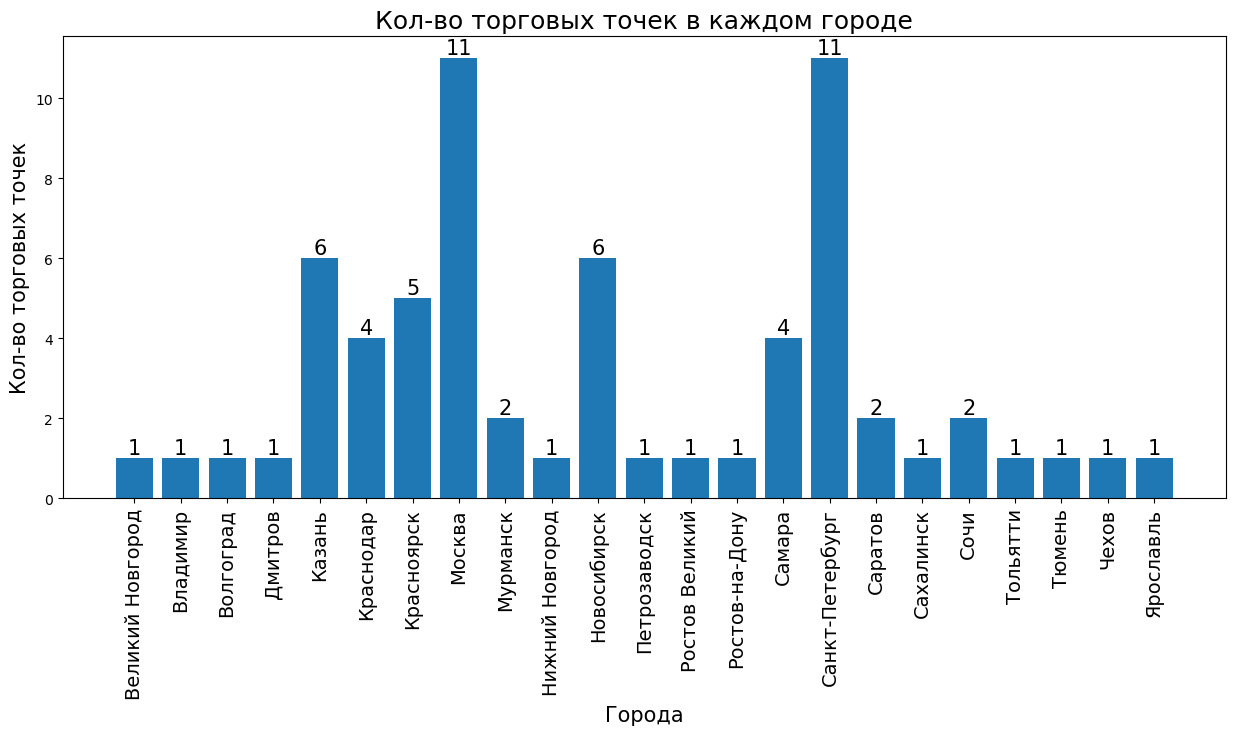

In [10]:
df_reg_dict_gr = df_reg_dict.groupby(['city'])['id_trading_point'].count().reset_index()
df_reg_dict_gr = df_reg_dict_gr.rename(columns = {'id_trading_point' : 'cnt'})
fig, ax1 = plt.subplots(figsize = (15, 6))
bars = plt.bar(df_reg_dict_gr['city'], df_reg_dict_gr['cnt'])
plt.title('Кол-во торговых точек в каждом городе', size = 18)
ax1.set_xlabel('Города', size = 15)
ax1.set_ylabel('Кол-во торговых точек', size = 15)
ax1.xaxis.set_tick_params(rotation=90, labelsize = 14)
ax1.bar_label(bars, fontsize = 15)
plt.show()

Делаем группировку датафрейма с платежами (очищенного от нулловых значений) по клиенту и находим сумму платежей для каждого клиента

In [11]:
df_pay_not_null_gr = df_pay_not_null.groupby(['id_client'])['amt_payment'].sum().reset_index()
df_pay_not_null_gr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28600 entries, 0 to 28599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_client    28600 non-null  int64  
 1   amt_payment  28600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 447.0 KB


Обьединяем таблицы: Сначала к основной таблице с клиентами (df_clients_not_null - левая таблица) присоединяем сгруппированную таблицу с платежами по каждому клиенту (df_pay_not_null_gr) и меняем нулловые значения в столбце amt_payment на 0. Затем к полученной таблице добавляем колонку с городами из таблицы df_reg_dict. Добавляем столбец флаг платежа flag_pay.      

In [12]:
df_clients_not_null_gr = pd.merge(df_clients_not_null, df_pay_not_null_gr, \
                                  how = 'left', on = 'id_client')
df_clients_not_null_gr.fillna(0, inplace = True)
df_clients_not_null_gr = pd.merge(df_clients_not_null_gr, df_reg_dict, \
                                  how = 'left', on = 'id_trading_point') 
df_clients_not_null_gr['flag_pay'] = np.where(df_clients_not_null_gr['amt_payment'] > 0, 1, 0)
df_clients_not_null_gr.info()                                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55356 entries, 0 to 55355
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
 4   amt_payment       55356 non-null  float64       
 5   city              55356 non-null  object        
 6   flag_pay          55356 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 2.7+ MB


In [13]:
df_clients_not_null_gr

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар,0
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар,1
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,0
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1


Создаем функции test_calc (для сравнения средних значений и конверсий) и mann_whitney_func (для сравнения распределений)

In [14]:
def test_calc(r1, r2, alpha = 0.05):
    stat, p_value = stats.ttest_ind(r1, r2)  
    
    if p_value < alpha:
        print('Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны')
    else:
        print('Гипотеза НО подтверждается: Средние чеки/конверсии равны')
    
    print(f'Среднее значение/конверсия в тестовой группе = {r1.mean()}')
    print(f'Среднее значение/конверсия в контрольной группе = {r2.mean()}')
    print(f'Стат критерий = {stat}')
    print(f'p_value = {p_value}')
    
    return stat, p_value

In [15]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    mw_stat, p_value = stats.mannwhitneyu(r1, r2)
    
    if p_value < alpha:
        print('Гипотеза НО НЕ подтверждается: Распределения НЕ равны')
    else:
        print('Гипотеза НО подтверждается: Распределения равны')
        
    print(f'p_value = {p_value}')
        
    return mw_stat, p_value

Запускаем цикл, чтобы найти торговые точки, на которых не было ни одной оплаты.

In [16]:
empty_list_1 = []

for i in df_clients_not_null_gr['id_trading_point'].unique():
    df_loc = df_clients_not_null_gr[df_clients_not_null_gr['id_trading_point'] == i]
    sum_a = df_clients_not_null_gr[(df_clients_not_null_gr['id_trading_point'] == i) \
         & (df_clients_not_null_gr['nflag_test'] == 0)]['amt_payment'].sum()
    sum_b = df_clients_not_null_gr[(df_clients_not_null_gr['id_trading_point'] == i) \
         & (df_clients_not_null_gr['nflag_test'] == 1)]['amt_payment'].sum()
    if (sum_a == 0) and (sum_b == 0):
        empty_list_1.append(i) 
        
print(empty_list_1)
    

[26, 7, 23, 4, 1, 13]


Запускаем цикл, чтобы найти торговые точки, на которых не было оплат или в тестовой или в контрольной группах

In [17]:
empty_list_2 = []

for i in df_clients_not_null_gr['id_trading_point'].unique():
    df_loc = df_clients_not_null_gr[df_clients_not_null_gr['id_trading_point'] == i]
    sum_a = df_clients_not_null_gr[(df_clients_not_null_gr['id_trading_point'] == i) \
         & (df_clients_not_null_gr['nflag_test'] == 0)]['amt_payment'].sum()
    sum_b = df_clients_not_null_gr[(df_clients_not_null_gr['id_trading_point'] == i) \
         & (df_clients_not_null_gr['nflag_test'] == 1)]['amt_payment'].sum()
    if (sum_a == 0) or (sum_b == 0):
        empty_list_2.append(i) 
        
print(empty_list_2)

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]


Создаем новый датафрейм. Убираем все торговые точки, которые попадают в два списка (empty_list_1 и empty_list_2)

In [18]:
df_1 = df_clients_not_null_gr[~(df_clients_not_null_gr['id_trading_point'].isin(empty_list_1 + empty_list_2))]
df_1 = df_1.reset_index(drop = True)
df_1

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1
3,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0
4,195818,2022-07-16 01:30:59.088,1,2652,4021.0,Москва,1
...,...,...,...,...,...,...,...
45313,188702,2022-06-28 06:16:25.664,0,453,1323.0,Санкт-Петербург,1
45314,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,0
45315,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1
45316,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1


In [19]:
df_1.info()
df_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45318 entries, 0 to 45317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         45318 non-null  int64         
 1   dtime_ad          45318 non-null  datetime64[ns]
 2   nflag_test        45318 non-null  int64         
 3   id_trading_point  45318 non-null  int64         
 4   amt_payment       45318 non-null  float64       
 5   city              45318 non-null  object        
 6   flag_pay          45318 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 2.2+ MB


,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,flag_pay
count,45318.000000,45318,45318.000000,45318.000000,45318.000000,45318.000000
mean,228009.605918,2022-07-14 23:17:54.647861760,0.495278,1202.962002,2319.490534,0.521316
min,178561.000000,2022-06-03 02:47:49.183000,0.000000,2.000000,0.000000,0.000000
25%,192426.250000,2022-06-24 20:46:29.189250048,0.000000,112.000000,0.000000,0.000000
50%,206413.500000,2022-07-14 20:48:29.227500032,0.000000,453.000000,1178.000000,1.000000
75%,262840.000000,2022-08-03 19:26:37.676750080,1.000000,1654.000000,3911.000000,1.000000
max,331964.000000,2022-08-29 00:02:17.878000,1.000000,9931.000000,43083.000000,1.000000
std,45298.985278,NaN,0.499983,1792.091001,2963.928692,0.499551


Делаем визуализацию платежей в тестовой и контрольной группах

In [20]:
test_group = df_1[df_1['nflag_test'] == 1]
control_group = df_1[df_1['nflag_test'] == 0]


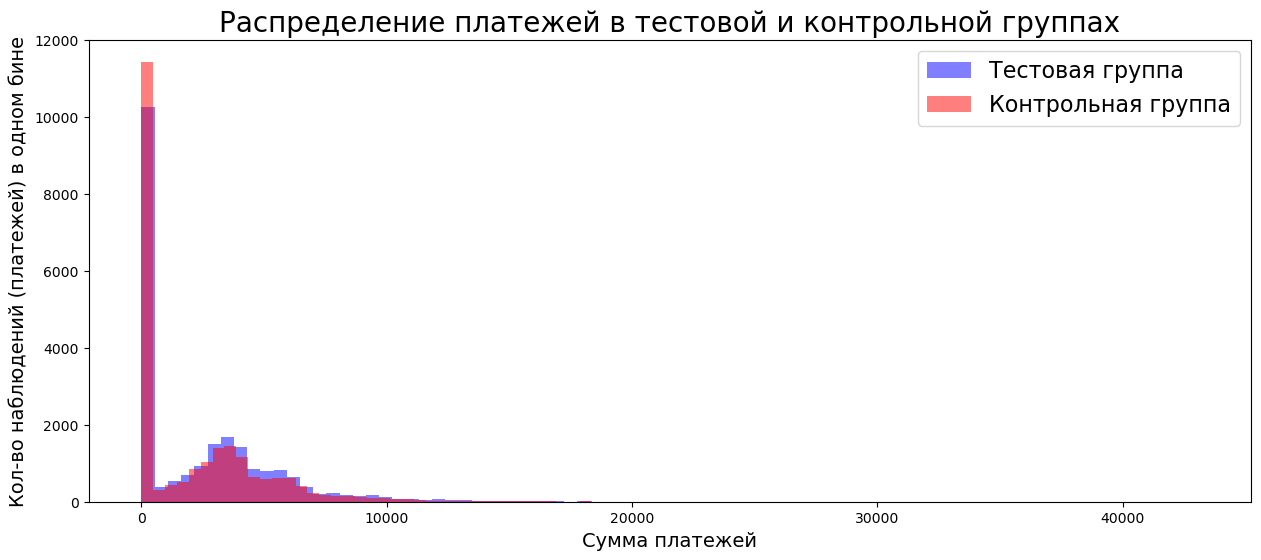

In [21]:
fig, ax1 = plt.subplots(figsize = (15, 6))
plt.hist(test_group['amt_payment'], bins = 80, alpha = 0.5, color = 'blue', label = 'Тестовая группа ')
plt.hist(control_group['amt_payment'], bins = 80, alpha = 0.5, color = 'red', label = 'Контрольная группа')
plt.title('Распределение платежей в тестовой и контрольной группах', size = 20)
plt.xlabel('Сумма платежей', size = 14)
plt.ylabel('Кол-во наблюдений (платежей) в одном бине', size = 14)
plt.legend(loc = 'upper right', fontsize = 16)
plt.show()

Применяем функцию test_calc. Сравниваем средние платежи в тестовой и контрольной группах без разбивки по городам и торговым точкам

In [22]:
r_1_mean = test_group['amt_payment']
r_2_mean = control_group['amt_payment']

test_calc(r_1_mean, r_2_mean)

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 2452.2773446201827
Среднее значение/конверсия в контрольной группе = 2189.1884317754557
Стат критерий = 9.456798235171377
p_value = 3.3214645838934018e-21


(9.456798235171377, 3.3214645838934018e-21)

Применяем функцию test_calc. Сравниваем конверсии в тестовой и контрольной группах без разбивки по городам и торговым точкам

In [23]:
r_1_conv = test_group['flag_pay']
r_2_conv = control_group['flag_pay']

test_calc(r_1_conv, r_2_conv)

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 0.5432835820895522
Среднее значение/конверсия в контрольной группе = 0.49975954181786386
Стат критерий = 9.282032730948323
p_value = 1.7338073027564523e-20


(9.282032730948323, 1.7338073027564523e-20)

Применяем функцию mann_whitney_func. Сравниваем распределения тестовой и котрольной групп без разбивки по городам и торговым точкам.

In [24]:
r_1_mw = test_group['amt_payment']
r_2_mw = control_group['amt_payment']

mann_whitney_func(r_1_mw, r_2_mw)

Гипотеза НО НЕ подтверждается: Распределения НЕ равны
p_value = 3.008345273971901e-24


(270040116.0, 3.008345273971901e-24)

Выполняем аналитику по Москве

In [25]:
r_1_mean_msk =  df_1[(df_1['city'] == 'Москва') & (df_1['nflag_test'] == 1)]['amt_payment']
r_2_mean_msk =  df_1[(df_1['city'] == 'Москва') & (df_1['nflag_test'] == 0)]['amt_payment']

r_1_conv_msk =  df_1[(df_1['city'] == 'Москва') & (df_1['nflag_test'] == 1)]['flag_pay']
r_2_conv_msk =  df_1[(df_1['city'] == 'Москва') & (df_1['nflag_test'] == 0)]['flag_pay']

print('МОСКВА:')
print()
print('Результаты ttest по сравнению средних:')
print()
test_calc(r_1_mean_msk, r_2_mean_msk)
print()
print('Результаты ttest по сравнению конверсий:')
print()
test_calc(r_1_conv_msk, r_2_conv_msk)
print()
print('Результаты MW test по сравнению распределений:')
print()
mann_whitney_func(r_1_mean_msk, r_2_mean_msk)

МОСКВА:

Результаты ttest по сравнению средних:

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 2367.9590805347243
Среднее значение/конверсия в контрольной группе = 1986.18059125964
Стат критерий = 7.676511027843395
p_value = 1.757549439555765e-14

Результаты ttest по сравнению конверсий:

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 0.5435278774046299
Среднее значение/конверсия в контрольной группе = 0.4879498714652956
Стат критерий = 6.190312288026295
p_value = 6.194689260032594e-10

Результаты MW test по сравнению распределений:

Гипотеза НО НЕ подтверждается: Распределения НЕ равны
p_value = 7.010591402203484e-16


(20595574.5, 7.010591402203484e-16)

Выполняем аналитику по СПБ

In [26]:
r_1_mean_spb =  df_1[(df_1['city'] == 'Санкт-Петербург') & (df_1['nflag_test'] == 1)]['amt_payment']
r_2_mean_spb =  df_1[(df_1['city'] == 'Санкт-Петербург') & (df_1['nflag_test'] == 0)]['amt_payment']

r_1_conv_spb =  df_1[(df_1['city'] == 'Санкт-Петербург') & (df_1['nflag_test'] == 1)]['flag_pay']
r_2_conv_spb =  df_1[(df_1['city'] == 'Санкт-Петербург') & (df_1['nflag_test'] == 0)]['flag_pay']

print('СПБ:')
print()
print('Результаты ttest по сравнению средних:')
print()
test_calc(r_1_mean_spb, r_2_mean_spb)
print()               
print('Результаты ttest по сравнению конверсий:')
print()
test_calc(r_1_conv_spb, r_2_conv_spb)
print()
print('Результаты MW test по сравнению распределений:')
print()
mann_whitney_func(r_1_mean_spb, r_2_mean_spb)

СПБ:

Результаты ttest по сравнению средних:

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 2427.462542182227
Среднее значение/конверсия в контрольной группе = 1913.5586377988272
Стат критерий = 8.759635784179547
p_value = 2.3198088937974163e-18

Результаты ttest по сравнению конверсий:

Гипотеза НО НЕ подтверждается: Средние чеки/конверсии НЕ равны
Среднее значение/конверсия в тестовой группе = 0.5471316085489314
Среднее значение/конверсия в контрольной группе = 0.44835363103292736
Стат критерий = 9.352468686561785
p_value = 1.065825659919673e-20

Результаты MW test по сравнению распределений:

Гипотеза НО НЕ подтверждается: Распределения НЕ равны
p_value = 2.0392184217953754e-20


(10899685.5, 2.0392184217953754e-20)

Запускаем цикл по городам

In [27]:
for i in df_1['city'].unique():
    r_1_mean_all_cities =  df_1[(df_1['city'] == i) & (df_1['nflag_test'] == 1)]['amt_payment']
    r_2_mean_all_cities =  df_1[(df_1['city'] == i) & (df_1['nflag_test'] == 0)]['amt_payment']

    r_1_conv_all_cities =  df_1[(df_1['city'] == i) & (df_1['nflag_test'] == 1)]['flag_pay']
    r_2_conv_all_cities =  df_1[(df_1['city'] == i) & (df_1['nflag_test'] == 0)]['flag_pay']
    
    print(i.upper(),':')
    print()
    print('Результаты ttest по сравнению средних:')
    print()
    test_calc(r_1_mean_all_cities, r_2_mean_all_cities)
    print()               
    print('Результаты ttest по сравнению конверсий:')
    print()
    test_calc(r_1_conv_all_cities, r_2_conv_all_cities)
    print()
    print('Результаты MW test по сравнению распределений:')
    print()
    mann_whitney_func(r_1_mean_all_cities, r_2_mean_all_cities)
    print()

КРАСНОЯРСК :

Результаты ttest по сравнению средних:

Гипотеза НО подтверждается: Средние чеки/конверсии равны
Среднее значение/конверсия в тестовой группе = 2437.4958840961476
Среднее значение/конверсия в контрольной группе = 2428.7775862068966
Стат критерий = 0.12000608689929208
p_value = 0.9044823881233125

Результаты ttest по сравнению конверсий:

Гипотеза НО подтверждается: Средние чеки/конверсии равны
Среднее значение/конверсия в тестовой группе = 0.5577872900889035
Среднее значение/конверсия в контрольной группе = 0.5613793103448276
Стат критерий = -0.27863631219717744
p_value = 0.7805336501430107

Результаты MW test по сравнению распределений:

Гипотеза НО подтверждается: Распределения равны
p_value = 0.8770469886251647

МУРМАНСК :

Результаты ttest по сравнению средних:

Гипотеза НО подтверждается: Средние чеки/конверсии равны
Среднее значение/конверсия в тестовой группе = 1865.2710900473933
Среднее значение/конверсия в контрольной группе = 1857.2197183098592
Стат критерий = 0

ДМИТРОВ :

Результаты ttest по сравнению средних:

Гипотеза НО подтверждается: Средние чеки/конверсии равны
Среднее значение/конверсия в тестовой группе = 579.3333333333334
Среднее значение/конверсия в контрольной группе = 483.4507042253521
Стат критерий = 0.3310524347645207
p_value = 0.7410763125801646

Результаты ttest по сравнению конверсий:

Гипотеза НО подтверждается: Средние чеки/конверсии равны
Среднее значение/конверсия в тестовой группе = 0.11538461538461539
Среднее значение/конверсия в контрольной группе = 0.09859154929577464
Стат критерий = 0.3285782051097397
p_value = 0.7429421277261776

Результаты MW test по сравнению распределений:

Гипотеза НО подтверждается: Распределения равны
p_value = 0.7422551789442879



Отдельный датафрейм c кол-вом наблюдений, кол-вом оплат, со средними чеками и конверсиями из просмотра в покупку по каждому городу в тестовой и контрольной группах (без разбивки на торговые точки)

In [28]:
df_cities = df_1.groupby(['city', 'nflag_test'], as_index = False).\
agg({'id_client':'count','flag_pay':'sum','amt_payment':'mean'})
df_cities['amt_payment'] = round(df_cities['amt_payment'], 2)
df_cities['conv'] = round(df_cities['flag_pay'] / df_cities['id_client'], 3)
df_cities = df_cities.rename(columns = {'id_client' : 'cnt', 'amt_payment' : 'avg_check'})
df_cities

,city,nflag_test,cnt,flag_pay,avg_check,conv
0,Владимир,0,608,303,2108.61,0.498
1,Владимир,1,509,280,2547.22,0.550
2,Волгоград,0,703,419,2601.76,0.596
3,Волгоград,1,657,363,2288.87,0.553
4,Дмитров,0,71,7,483.45,0.099
5,Дмитров,1,78,9,579.33,0.115
6,Казань,0,2577,1224,2610.69,0.475
7,Казань,1,2500,1197,2731.91,0.479
8,Краснодар,0,1139,744,2912.43,0.653
9,Краснодар,1,1024,629,2696.80,0.614


Создаем датафрейм с результатами исследования для каждой торговой точки

In [29]:
df_res = pd.DataFrame(columns = ['city', 'id_trading_point', 'count_test', 'count_control',\
                   'count_all', 'percent_count', 'avg_payment_test', 'avg_payment_control',\
                   'diff', 'sigma_test', 'sigma_control', 'ttest', 'pvalue_ttest'])

for i in df_1['city'].unique():
    
    df_city = df_1[df_1['city'] == i]
    rows_to_append = []
    
    for g in df_city['id_trading_point'].unique():
        
        mean_test = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 1)]\
        ['amt_payment'].mean()
        mean_control = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 0)]\
        ['amt_payment'].mean()
        std_test = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 1)]\
        ['amt_payment'].std()
        std_control = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 0)]\
        ['amt_payment'].std()
        cnt_test = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 1)]\
        ['amt_payment'].count()
        cnt_control = df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 0)]\
        ['amt_payment'].count()
        percent_cnt = (cnt_test + cnt_control)/df_1['amt_payment'].count()
        r1 =  df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 1)]\
        ['amt_payment']
        r2 =  df_city[(df_city['id_trading_point'] == g) & (df_city['nflag_test'] == 0)]\
        ['amt_payment']
        s, p = stats.ttest_ind(r1, r2)
        
        row_dict = {'city' : i,
                    'id_trading_point' : g,
                    'count_test' : cnt_test ,
                    'count_control': cnt_control,
                    'count_all': cnt_test + cnt_control,
                    'percent_count': percent_cnt,
                    'avg_payment_test': mean_test,
                    'avg_payment_control': mean_control,
                    'diff': mean_test - mean_control,
                    'sigma_test': std_test,
                    'sigma_control': std_control,
                    'ttest': s,
                    'pvalue_ttest': p}
           
        rows_to_append.append(row_dict)
    df_to_append = pd.DataFrame(rows_to_append)
    df_res = pd.concat([df_res, df_to_append], ignore_index = True)


In [86]:
df_res.head(60)

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Красноярск,212,593,575,1168,0.025773,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01
1,Красноярск,278,535,489,1024,0.022596,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02
2,Красноярск,202,551,565,1116,0.024626,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01
3,Красноярск,444,650,562,1212,0.026744,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01
4,Красноярск,277,708,709,1417,0.031268,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01
5,Мурманск,54,633,640,1273,0.028090,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01
6,Мурманск,55,422,425,847,0.018690,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01
7,Казань,991,270,294,564,0.012445,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02
8,Казань,699,482,494,976,0.021537,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01
9,Казань,477,382,386,768,0.016947,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01


Добавляем в результирующий датафрейм столбец флаг(лейбл) с вариантами исходов (положительный, отрицательный, нейтральный):

In [32]:
df_res['flag_res'] = np.where((df_res['diff'] > 0) & (df_res['pvalue_ttest'] < 0.05), 'positive', \
            np.where((df_res['diff'] < 0) & (df_res['pvalue_ttest'] < 0.05), 'negative', 'neutral'))
df_res.head(60)

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_res
0,Красноярск,212,593,575,1168,0.025773,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,neutral
1,Красноярск,278,535,489,1024,0.022596,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,neutral
2,Красноярск,202,551,565,1116,0.024626,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,neutral
3,Красноярск,444,650,562,1212,0.026744,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,neutral
4,Красноярск,277,708,709,1417,0.031268,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,neutral
5,Мурманск,54,633,640,1273,0.028090,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,neutral
6,Мурманск,55,422,425,847,0.018690,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,neutral
7,Казань,991,270,294,564,0.012445,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,positive
8,Казань,699,482,494,976,0.021537,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,neutral
9,Казань,477,382,386,768,0.016947,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,neutral


Делим результирующий датафрейм на три: в зависимости от варианта исхода (положительный, отрицательный, нейтральный)

In [33]:
df_res_pos = df_res.loc[df_res['flag_res'] == 'positive'].reset_index(drop = True)
df_res_pos.head(60)

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_res
0,Казань,991,270,294,564,0.012445,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,positive
1,Санкт-Петербург,453,1066,1049,2115,0.046670,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07,positive
2,Санкт-Петербург,801,225,212,437,0.009643,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02,positive
3,Санкт-Петербург,573,177,160,337,0.007436,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05,positive
4,Санкт-Петербург,900,335,341,676,0.014917,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04,positive
5,Санкт-Петербург,117,625,587,1212,0.026744,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04,positive
6,Санкт-Петербург,213,232,255,487,0.010746,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03,positive
7,Санкт-Петербург,891,159,167,326,0.007194,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02,positive
8,Москва,2652,2273,2370,4643,0.102454,2506.616806,1972.847679,533.769127,2842.182948,2565.878242,6.722230,2.005922e-11,positive
9,Москва,1287,370,357,727,0.016042,2128.556757,1394.655462,733.901295,2437.376458,2338.461779,4.140297,3.876566e-05,positive


In [35]:
df_res_neg = df_res.loc[df_res['flag_res'] == 'negative'].reset_index(drop = True)
df_res_neg.head(60)

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_res
0,Москва,9931,153,137,290,0.006399,1415.784314,1968.693431,-552.909117,2038.164247,2403.397857,-2.119197,0.034929,negative
1,Волгоград,66,657,703,1360,0.030010,2288.870624,2601.761024,-312.890400,2682.567610,2830.193773,-2.089272,0.036869,negative
2,Краснодар,1101,785,869,1654,0.036498,2176.003822,2523.578826,-347.575005,2722.624494,2960.352338,-2.476736,0.013358,negative


In [36]:
df_res_neu = df_res.loc[df_res['flag_res'] == 'neutral'].reset_index(drop = True)
df_res_neu.head(60)

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_res
0,Красноярск,212,593,575,1168,0.025773,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,0.628771,neutral
1,Красноярск,278,535,489,1024,0.022596,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,0.069011,neutral
2,Красноярск,202,551,565,1116,0.024626,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,0.248308,neutral
3,Красноярск,444,650,562,1212,0.026744,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,0.380802,neutral
4,Красноярск,277,708,709,1417,0.031268,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,0.326413,neutral
5,Мурманск,54,633,640,1273,0.028090,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,0.922301,neutral
6,Мурманск,55,422,425,847,0.018690,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,0.991012,neutral
7,Казань,699,482,494,976,0.021537,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,0.552480,neutral
8,Казань,477,382,386,768,0.016947,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,0.372891,neutral
9,Казань,544,377,416,793,0.017499,2621.427056,2635.548077,-14.121021,3714.894751,4639.820746,-0.046997,0.962527,neutral


Выгружаем полученные данные в Excel в один документ на 3 разных листа

In [37]:
writer = pd.ExcelWriter('all_results.xlsx')

df_res_pos.to_excel(writer, sheet_name = 'positive_outcomes')
df_res_neg.to_excel(writer, sheet_name = 'negative_outcomes')
df_res_neu.to_excel(writer, sheet_name = 'neutral_outcomes')

writer.close()